In [110]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Question 1

In [111]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')

In [112]:
users.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [113]:
mean_age_per_occupation = users.groupby(by='occupation').agg(age=('age', 'mean'))

In [114]:
mean_age_per_occupation = mean_age_per_occupation.reset_index()

In [115]:
mean_age_per_occupation = mean_age_per_occupation.round({'age':2})

##### Mean age per occupation

In [116]:
mean_age_per_occupation

,occupation,age
0,administrator,38.75
1,artist,31.39
2,doctor,43.57
3,educator,42.01
4,engineer,36.39
5,entertainment,29.22
6,executive,38.72
7,healthcare,41.56
8,homemaker,32.57
9,lawyer,36.75


##### Male ratio per occupation and sort it from the most to the least

In [117]:
occupation_gender_counts = users.groupby(['occupation', 'gender']).size().unstack()

In [118]:
occupation_gender_counts = occupation_gender_counts.fillna(0)

In [119]:
occupation_gender_counts['Male_Ratio'] = occupation_gender_counts['M'] / (occupation_gender_counts['M'] + occupation_gender_counts['F'])

In [120]:
occupation_gender_counts = occupation_gender_counts.sort_values(by='Male_Ratio', ascending=False)

In [121]:
occupation_gender_counts = occupation_gender_counts.round({'Male_Ratio':2})

In [122]:
occupation_gender_counts

gender,F,M,Male_Ratio
occupation,,,
doctor,0.0,7.0,1.00
engineer,2.0,65.0,0.97
technician,1.0,26.0,0.96
retired,1.0,13.0,0.93
programmer,6.0,60.0,0.91
executive,3.0,29.0,0.91
scientist,3.0,28.0,0.90
entertainment,2.0,16.0,0.89
lawyer,2.0,10.0,0.83


#####  For each occupation, calculate the minimum and maximum ages

In [123]:
users_grouped_min_max_age = users.groupby(by=['occupation']).agg(
    min_age=('age','min'),
    max_age=('age','max')
)

In [124]:
users_grouped_min_max_age = users_grouped_min_max_age.reset_index()

In [125]:
users_grouped_min_max_age

,occupation,min_age,max_age
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


##### For each combination of occupation and sex, calculate the mean age

In [126]:
users_occ_sex_mean_age = users.groupby(by=['occupation','gender']).agg(
    mean_age=('age','mean')
).reset_index().round({'mean_age':2})

In [127]:
users_occ_sex_mean_age

,occupation,gender,mean_age
0,administrator,F,40.64
1,administrator,M,37.16
2,artist,F,30.31
3,artist,M,32.33
4,doctor,M,43.57
5,educator,F,39.12
6,educator,M,43.10
7,engineer,F,29.50
8,engineer,M,36.60
9,entertainment,F,31.00


##### For each occupation present the percentage of women and men

In [128]:
occupation_gender_percent = users.groupby(['occupation', 'gender']).size().unstack()

In [129]:
occupation_gender_percent = occupation_gender_percent.fillna(0)

In [130]:
occupation_gender_percent['Male_Percent'] = occupation_gender_percent['M'] * 100 / (occupation_gender_percent['M'] + occupation_gender_percent['F'])

In [131]:
occupation_gender_percent['Female_Percent'] = occupation_gender_percent['F'] * 100 / (occupation_gender_percent['M'] + occupation_gender_percent['F'])

In [132]:
occupation_gender_percent = occupation_gender_percent.round({'Male_Percent':2,'Female_Percent':2})

In [133]:
occupation_gender_percent

gender,F,M,Male_Percent,Female_Percent
occupation,,,,
administrator,36.0,43.0,54.43,45.57
artist,13.0,15.0,53.57,46.43
doctor,0.0,7.0,100.00,0.00
educator,26.0,69.0,72.63,27.37
engineer,2.0,65.0,97.01,2.99
entertainment,2.0,16.0,88.89,11.11
executive,3.0,29.0,90.62,9.38
healthcare,11.0,5.0,31.25,68.75
homemaker,6.0,1.0,14.29,85.71


### Question 2

In [134]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [135]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [136]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

##### Select only the Goal column

In [137]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


##### How many team participated in the Euro2012?

In [138]:
euro12['Team'].unique().shape[0]

16

##### What is the number of columns in the dataset?

In [139]:
len(euro12.columns)

35

##### View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [140]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]

In [141]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


##### Sort the teams by Red Cards, then to Yellow Cards

In [142]:
discipline.sort_values(['Yellow Cards','Red Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
6,Greece,9,1
0,Croatia,9,0
9,Poland,7,1
1,Czech Republic,7,0
14,Sweden,7,0
11,Republic of Ireland,6,1
4,France,6,0


##### Calculate the mean Yellow Cards given per Team

In [143]:
discipline['Yellow Cards'].mean().round()

7.0

##### Filter teams that scored more than 6 goals

In [144]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


##### Select the teams that start with G

In [145]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


##### Select the first 7 columns

In [146]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


##### Select all columns except the last 3

In [147]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


##### Present only the Shooting Accuracy from England, Italy and Russia

In [148]:
euro12.loc[euro12['Team'].isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3

In [149]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

In [150]:
s1.head()

0    2
1    4
2    4
3    4
4    3
dtype: int64

In [151]:
s2.head()

0    1
1    2
2    3
3    2
4    3
dtype: int64

In [152]:
s3.head()

0    27729
1    26936
2    17731
3    24920
4    25095
dtype: int64

In [153]:
housing = pd.concat([s1, s2, s3], axis=1)

In [154]:
housing

,0,1,2
0,2,1,27729
1,4,2,26936
2,4,3,17731
3,4,2,24920
4,3,3,25095
...,...,...,...
95,2,3,29805
96,1,1,22614
97,3,1,16738
98,3,2,25244


In [155]:
housing = housing.rename(columns={0: 'bedrs',1: 'bathrs',2:'price_sqr_meter'})

In [156]:
housing

,bedrs,bathrs,price_sqr_meter
0,2,1,27729
1,4,2,26936
2,4,3,17731
3,4,2,24920
4,3,3,25095
...,...,...,...
95,2,3,29805
96,1,1,22614
97,3,1,16738
98,3,2,25244


In [157]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)

In [158]:
bigcolumn = bigcolumn.to_frame()

In [159]:
bigcolumn

,0
0,2
1,4
2,4
3,4
4,3
...,...
95,29805
96,22614
97,16738
98,25244


In [160]:
# Looks like the index is preserved for each of the columns after concatenating

In [161]:
# resetting the index so that it goes from 0 to 299 for 300 total rows

In [162]:
bigcolumn = bigcolumn.reset_index(drop=True)

In [163]:
bigcolumn

,0
0,2
1,4
2,4
3,4
4,3
...,...
295,29805
296,22614
297,16738
298,25244


### Question 4

In [164]:
data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]])

/tmp/ipykernel_3943/609163470.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]])


In [165]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


##### Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [166]:
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

In [167]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

In [168]:
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


##### Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [169]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

In [170]:
data = data.set_index('Yr_Mo_Dy')

In [171]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


##### Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [172]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

##### Compute how many non-missing values there are in total

In [173]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

##### Calculate the mean windspeeds of the windspeeds over all the locations and all the times

In [174]:
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

##### Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [175]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


##### Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

In [176]:
day_stats = pd.DataFrame()

In [177]:
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


##### Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [178]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

##### Downsample the record to a yearly frequency for each location

In [179]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


##### Downsample the record to a monthly frequency for each location

In [180]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


##### Downsample the record to a weekly frequency for each location

In [181]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


##### Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week

In [182]:
weekly = data.resample('W').agg(['min','max','mean','std'])

In [183]:
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

### Question 5

In [184]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

##### See the first 10 entries

In [185]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


##### What is the number of observations in the dataset

In [186]:
chipo.shape[0]

4622

##### What is the number of columns in the dataset?

In [187]:
chipo.shape[1]

5

##### Print the name of all the columns

In [188]:
for col_name in list(chipo.columns.values):
    print(col_name)

order_id
quantity
item_name
choice_description
item_price


##### How is the dataset indexed

In [189]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

##### Which was the most-ordered item

In [190]:
most_ordered = chipo.groupby(by='item_name').agg(
    total_quantity=('quantity','sum')
).reset_index()

In [191]:
most_ordered.sort_values(by='total_quantity', ascending=False).head(1)

,item_name,total_quantity
17,Chicken Bowl,761


In [192]:
# most ordered item is: Chicken Bowl

##### For the most-ordered item, how many items were ordered

In [193]:
# most ordered item was ordered for a total of 761 quantities

##### What was the most ordered item in the choice_description column

In [194]:
most_ordered2 = chipo.groupby(by='choice_description').agg(
    total_quantity=('quantity',sum)
).reset_index()

In [195]:
most_ordered2.sort_values(by='total_quantity', ascending=False).head(1)

,choice_description,total_quantity
15,[Diet Coke],159


##### How many items were orderd in total

In [196]:
chipo.quantity.sum()

4972

##### Turn the item price into a float

In [197]:
chipo.item_price.dtype

dtype('O')

In [198]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))

In [199]:
chipo.item_price.dtype

dtype('float64')

##### How much was the revenue for the period in the dataset

In [200]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

In [201]:
print(f'revenue: ${revenue}')

revenue: $39237.02


##### How many orders were made in the period

In [202]:
chipo.order_id.value_counts().count()

1834

##### What is the average revenue amount per order

In [203]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

In [204]:
order_grouped = chipo.groupby(by=['order_id']).sum()

In [205]:
round(order_grouped['revenue'].mean(),2)

21.39

##### How many different items are sold

In [206]:
chipo.item_name.value_counts().count()

50

### Question 6

In [207]:
us_marriage_divorce_data=pd.read_csv('us-marriages-divorces-1867-2014.csv')

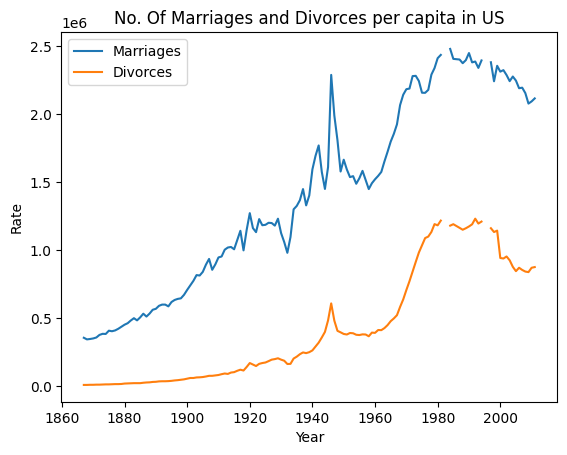

In [208]:
ax = us_marriage_divorce_data.plot('Year',y=['Marriages','Divorces'], title='No. Of Marriages and Divorces per capita in US')
ax.set_ylabel('Rate')
plt.show()

### Question 7

In [209]:
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

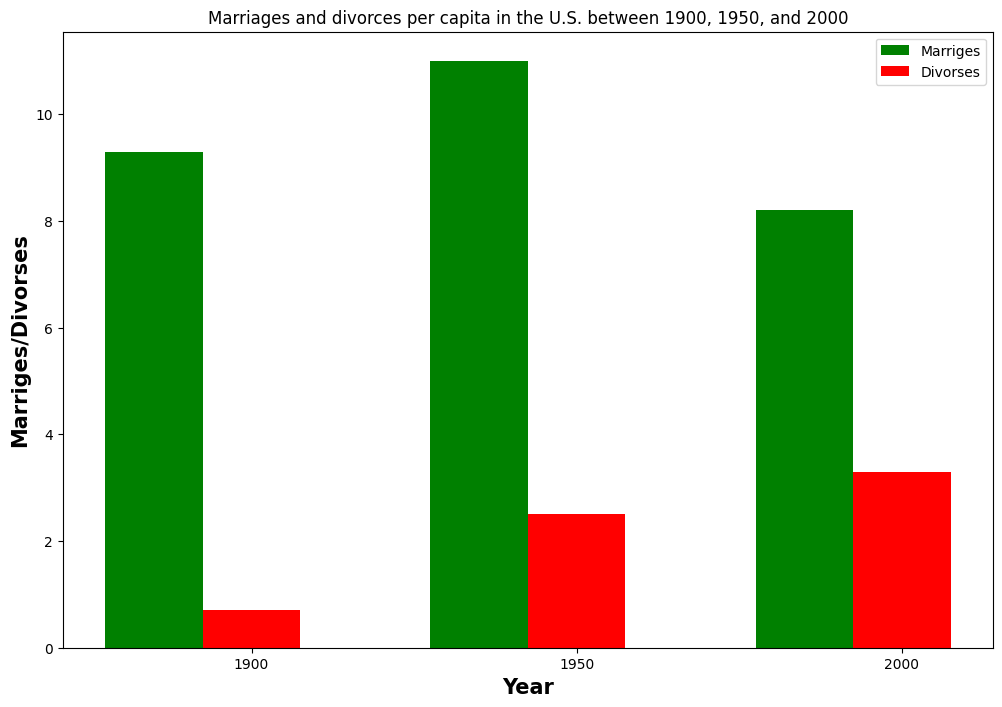

In [210]:
width=0.30
fig=plt.subplots(figsize=(12,8))
mars=np.arange(len(divorces_per_capita))
divs=[x+width for x in mars]
plt.bar(mars,marriages_per_capita,color='g', width=width,label="Marriges")
plt.bar(divs,divorces_per_capita,color='r', width=width, label="Divorses")
plt.xticks([r+width for r in range(len(divorces_per_capita))],["1900","1950","2000"])
plt.xlabel("Year", fontweight="bold", fontsize=15)
plt.ylabel("Marriges/Divorses", fontweight="bold", fontsize=15)
plt.title("Marriages and divorces per capita in the U.S. between 1900, 1950, and 2000")
plt.legend()
plt.show()

### Question 8

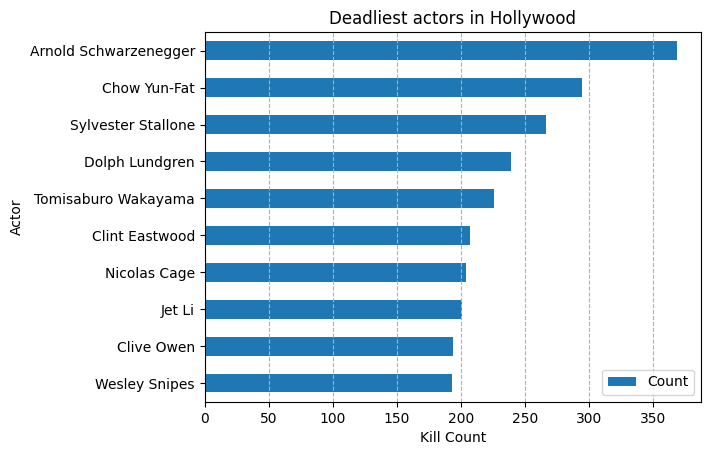

In [211]:
df = pd.read_csv('actor_kill_counts.csv')
df = df.sort_values(by='Count', ascending=True)

df.plot.barh(x='Actor', y='Count')

plt.ylabel('Actor')
plt.xlabel('Kill Count')

plt.grid(axis='x', linestyle = '--')
plt.title('Deadliest actors in Hollywood')
plt.show()

### Question 9

In [212]:
roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[
    roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors) - number_assassinated

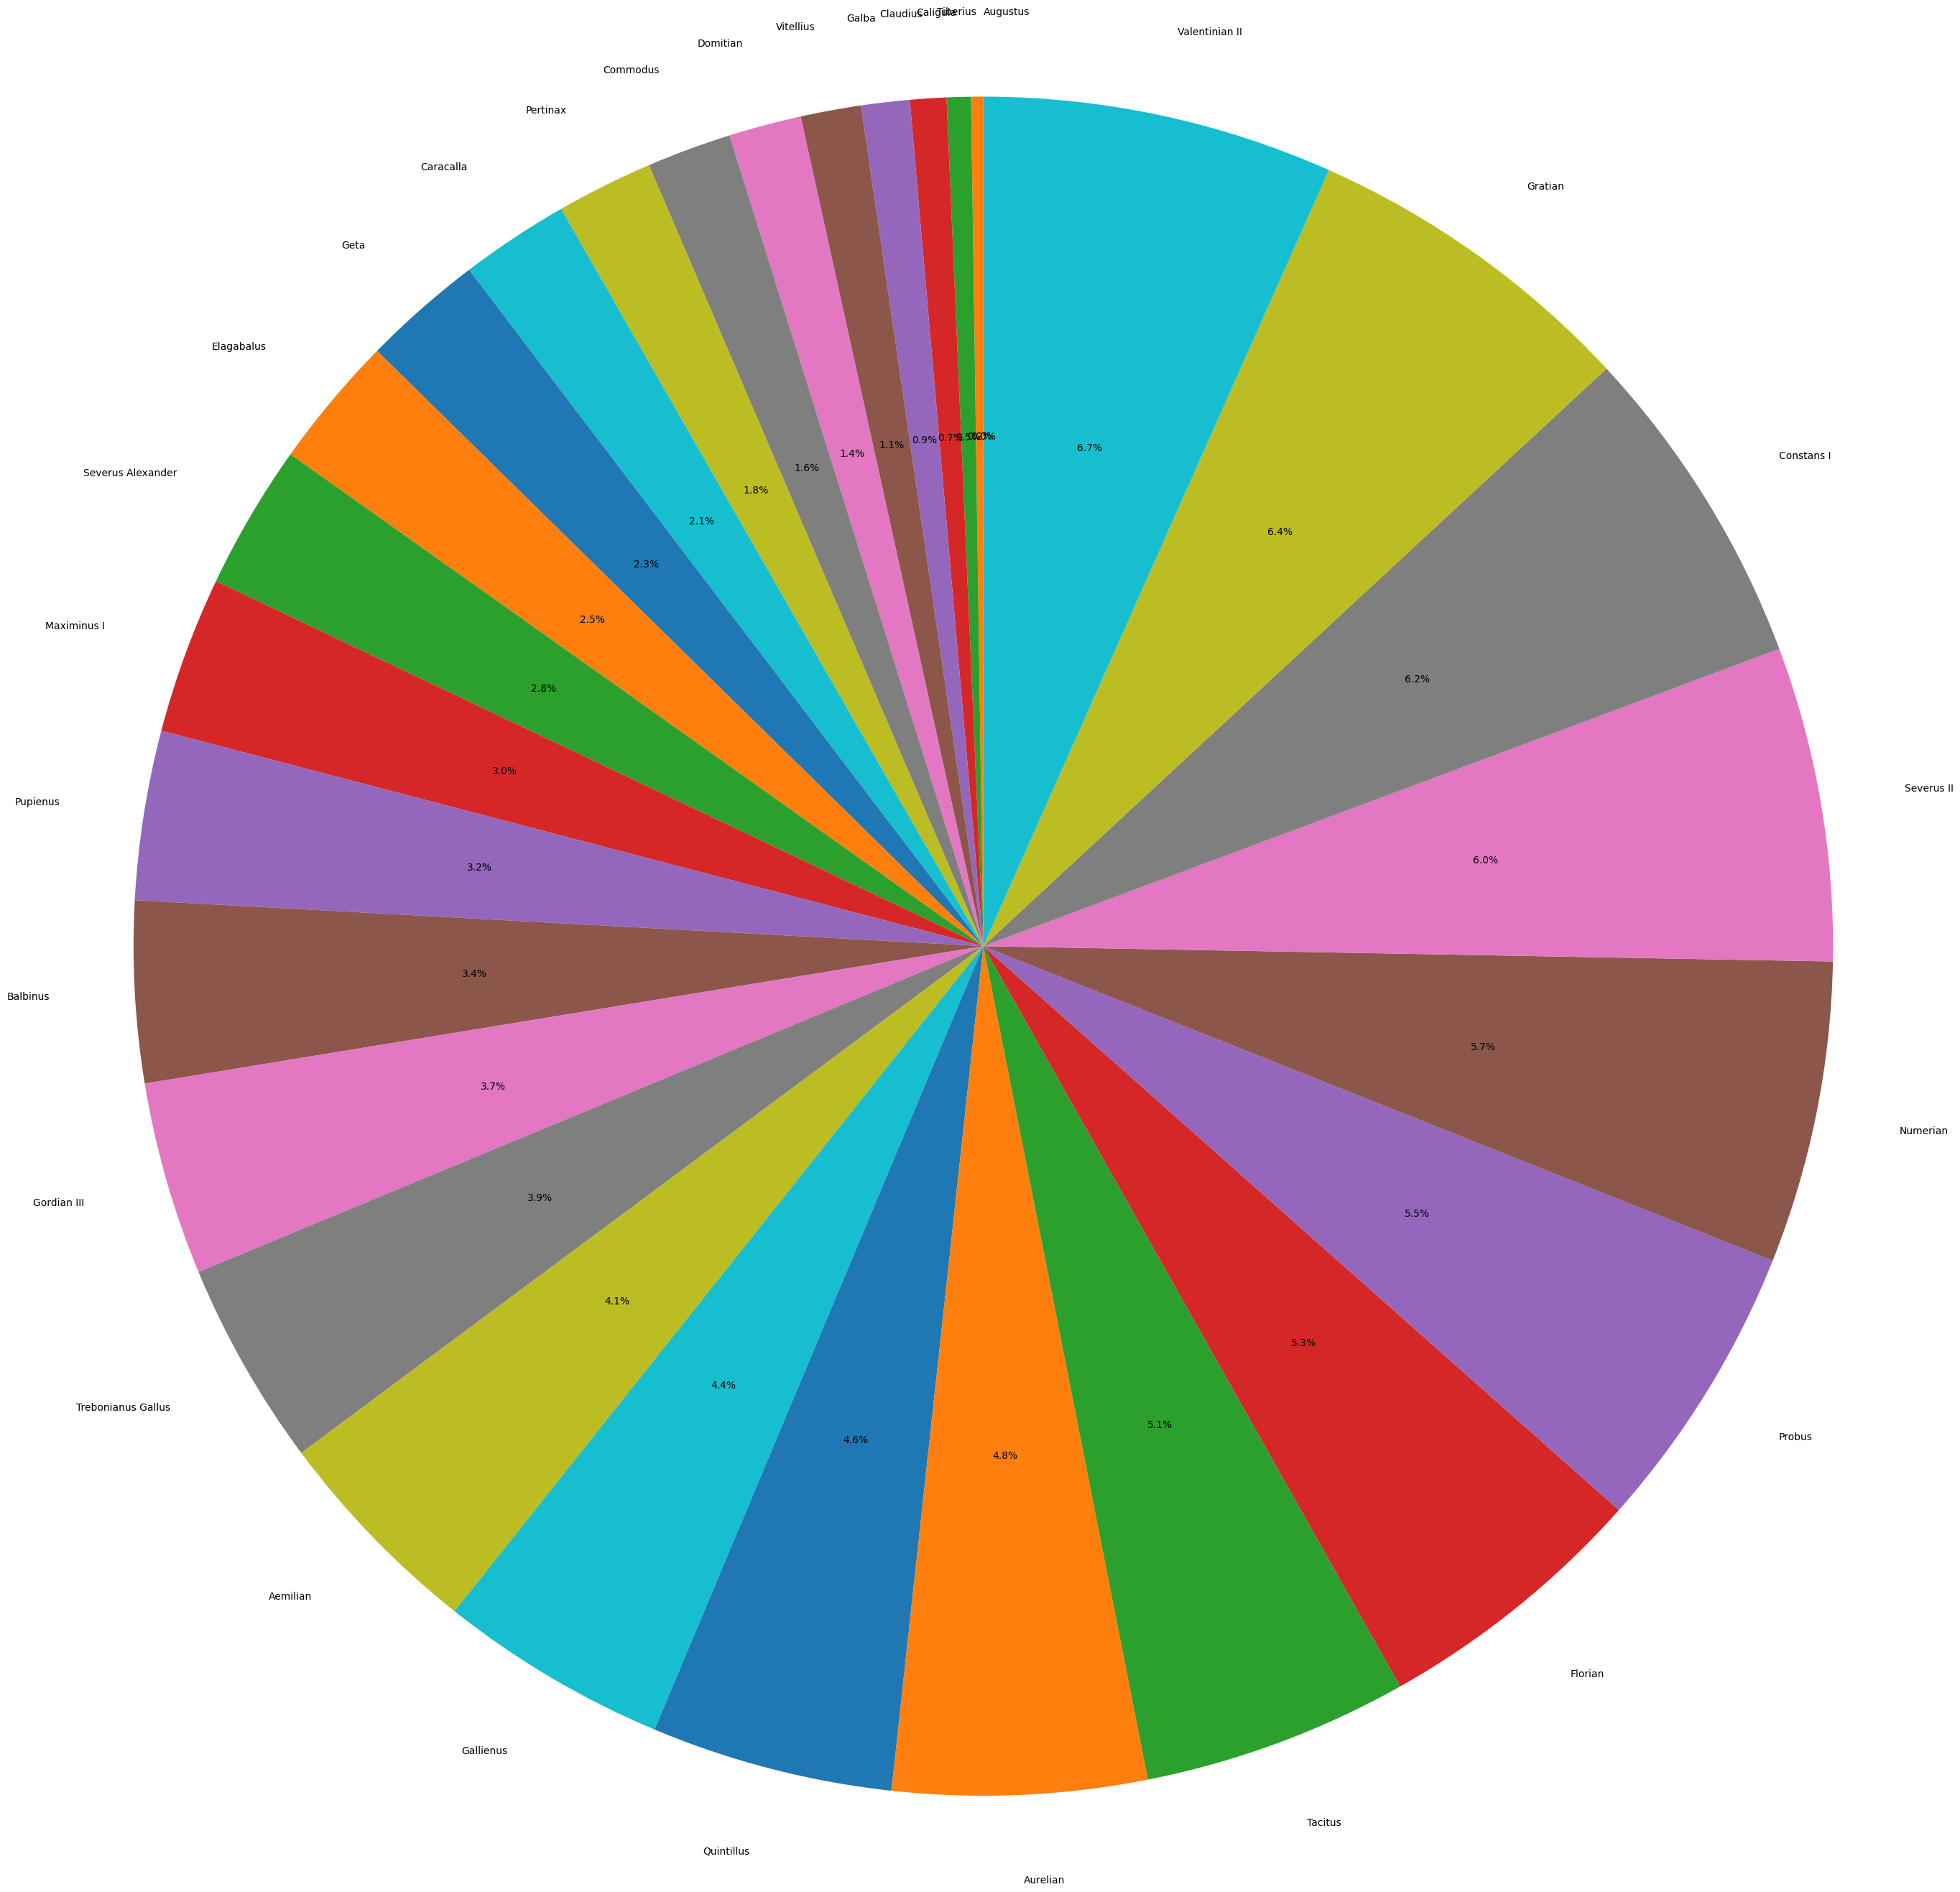

In [213]:
emperor = assassinated_emperors["Emperor"]
cause_of_death = assassinated_emperors["Cause_of_Death"]
plt.pie(range(len(cause_of_death)), labels=emperor,autopct='%1.1f%%', startangle=90, radius=0.08 * 100)
plt.show()

### Question 10

In [214]:
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [215]:
df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [216]:
df.columns

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')

In [217]:
df = df.rename(columns={'Total Arcade Revenue (billions)':'Revenue','Computer Science Doctorates Awarded (US)':'Awards'})

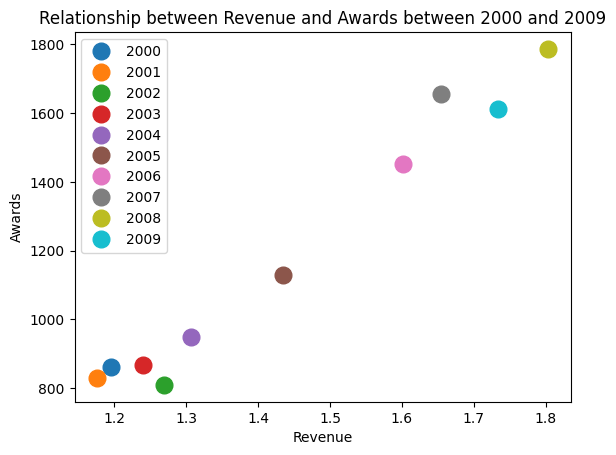

In [218]:
groups = df.groupby('Year')
for name, group in groups:
    plt.plot(group.Revenue, group.Awards, marker='o', linestyle='', markersize=12, label=name)
plt.legend()
plt.xlabel("Revenue")
plt.ylabel("Awards")
plt.title("Relationship between Revenue and Awards between 2000 and 2009")
plt.show()